# Data Aggregation and Group Operations

In [29]:
import pandas as pd
import numpy as np

## GroupBy mechanics

In [30]:
df = pd.DataFrame({'key1' : list('aabba'),
                   'key2' : ['one', 'two', 'one', 'two', 'one'],
                   'data1' : np.random.randn(5) * 20 + 10,
                   'data2' : np.random.randn(5) * 3 + 2})
df

,key1,key2,data1,data2
0,a,one,20.011972,-2.814325
1,a,two,13.366590,5.897955
2,b,one,18.528179,-0.199150
3,b,two,2.822286,5.248880
4,a,one,10.574689,0.649364


In [31]:
df.groupby('key1')

In [32]:
df.groupby('key1').mean()

,data1,data2
key1,,
a,14.651084,1.244331
b,10.675232,2.524865


In [33]:
df.groupby('key1', as_index=False).mean()

,key1,data1,data2
0,a,14.651084,1.244331
1,b,10.675232,2.524865


In [34]:
double_grouped = df.groupby(['key1', 'key2']).mean()
double_grouped

data1     data2
key1 key2                     
a    one   15.293331 -1.082481
     two   13.366590  5.897955
b    one   18.528179 -0.199150
     two    2.822286  5.248880

In [35]:
double_grouped.index

MultiIndex(levels=[['a', 'b'], ['one', 'two']],
           labels=[[0, 0, 1, 1], [0, 1, 0, 1]],
           names=['key1', 'key2'])

Explicarlo un poco

In [36]:
double_grouped.loc[('a', 'one')]

data1    15.293331
data2    -1.082481
Name: (a, one), dtype: float64

Accediendo mediante loc, notad como cambia la indexación debido al Multiindex

In [37]:
double_grouped.loc[('b','two'), 'data2']

5.248880238429603

Para acceder mediante iloc, la forma es la habitual pues no se accede por índice

In [38]:
double_grouped.iloc[3,1]

5.248880238429603

También podemos hacer el groubby con una serie, lista o np.array pero notad que en el caso de la serie hay que tener en cuenta que el índice coincida:

In [39]:
province = pd.Series(['M', 'M', 'B', 'V', 'V'], index=list('abcde'))

df.groupby(province).mean()

,data1,data2


In [40]:
df.groupby(['M', 'M', 'B', 'V', 'V']).mean()

,data1,data2
B,18.528179,-0.199150
M,16.689281,1.541815
V,6.698488,2.949122


In [41]:
province = pd.Series(['M', 'M', 'B', 'V', 'V'])

df.groupby(province).mean()

,data1,data2
B,18.528179,-0.199150
M,16.689281,1.541815
V,6.698488,2.949122


In [42]:
df.groupby(province).size()

B    1
M    2
V    2
dtype: int64

In [43]:
df.groupby('key1').size()

key1
a    3
b    2
dtype: int64

In [44]:
df.groupby(['key1', 'key2']).size()

key1  key2
a     one     2
      two     1
b     one     1
      two     1
dtype: int64

In [45]:
df.groupby(['key1', 'key2'], as_index=False).size().values

array([2, 1, 1, 1])

In [46]:
df.groupby(province).std()

,data1,data2
B,NaN,NaN
M,4.698995,6.160513
V,5.481777,3.252349


### Iterating over groups

In [47]:
for group in df.groupby('key2'):
    print(type(group))

<class 'tuple'>
<class 'tuple'>


In [48]:
for id_, group in df.groupby('key2'):
    print(type(id_), type(group))

<class 'str'> <class 'pandas.core.frame.DataFrame'>
<class 'str'> <class 'pandas.core.frame.DataFrame'>


In [49]:
for id_, group in df.groupby('key2'):
    print(id_)
    print(group)

one
  key1 key2      data1     data2
0    a  one  20.011972 -2.814325
2    b  one  18.528179 -0.199150
4    a  one  10.574689  0.649364
two
  key1 key2      data1     data2
1    a  two  13.366590  5.897955
3    b  two   2.822286  5.248880


### Selecting a column or subset of columns

In [50]:
df.groupby('key2')['data1'].sum()

key2
one    49.114840
two    16.188876
Name: data1, dtype: float64

In [51]:
df.groupby('key2').data1.sum()

key2
one    49.114840
two    16.188876
Name: data1, dtype: float64

## Data aggregation

In [52]:
df.groupby('key2').quantile(.9)

0.9,data1,data2
key2,,
one,19.715213,0.479661
two,12.312159,5.833048


In [55]:
gbobject = df.groupby('key2')
help(gbobject)

Help on DataFrameGroupBy in module pandas.core.groupby.groupby object:

class DataFrameGroupBy(NDFrameGroupBy)
 |  Class for grouping and aggregating relational data. See aggregate,
 |  transform, and apply functions on this object.
 |  
 |  It's easiest to use obj.groupby(...) to use GroupBy, but you can also do:
 |  
 |  ::
 |  
 |      grouped = groupby(obj, ...)
 |  
 |  Parameters
 |  ----------
 |  obj : pandas object
 |  axis : int, default 0
 |  level : int, default None
 |      Level of MultiIndex
 |  groupings : list of Grouping objects
 |      Most users should ignore this
 |  exclusions : array-like, optional
 |      List of columns to exclude
 |  name : string
 |      Most users should ignore this
 |  
 |  Notes
 |  -----
 |  After grouping, see aggregate, apply, and transform functions. Here are
 |  some other brief notes about usage. When grouping by multiple groups, the
 |  result index will be a MultiIndex (hierarchical) by default.
 |  
 |  Iteration produces (key, gr

In [56]:
def peak_to_peak(series):
    return series.max() - series.min()

gbobject.agg(peak_to_peak)

,data1,data2
key2,,
one,9.437283,3.463689
two,10.544303,0.649075


In [57]:
df[df['key2'] == 'one']

,key1,key2,data1,data2
0,a,one,20.011972,-2.814325
2,b,one,18.528179,-0.199150
4,a,one,10.574689,0.649364


In [58]:
one_group = df[df['key2'] == 'one']
numeric_columns = one_group[['data1', 'data2']]
numeric_columns

,data1,data2
0,20.011972,-2.814325
2,18.528179,-0.199150
4,10.574689,0.649364


In [59]:
peak_to_peak(numeric_columns) 

data1    9.437283
data2    3.463689
dtype: float64

In [60]:
gbobject.agg(np.sum) 

,data1,data2
key2,,
one,49.114840,-2.364112
two,16.188876,11.146835


In [61]:
gbobject.sum()

,data1,data2
key2,,
one,49.114840,-2.364112
two,16.188876,11.146835


In [62]:
gbobject.agg(['sum']) 

,key1,data1,data2
,sum,sum,sum
key2,,,
one,aba,49.114840,-2.364112
two,ab,16.188876,11.146835


In [63]:
np.random.seed(2314)
np.random.normal()

0.15537406257846584

### Column-wise and multiple function application

In [64]:
!wget https://raw.githubusercontent.com/wesm/pydata-book/1st-edition/ch08/tips.csv

--2019-05-25 17:18:42--  https://raw.githubusercontent.com/wesm/pydata-book/1st-edition/ch08/tips.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.132.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.132.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7943 (7,8K) [text/plain]
Saving to: ‘tips.csv.3’

tips.csv.3          100%[===================>]   7,76K  --.-KB/s    in 0,03s   

2019-05-25 17:18:44 (261 KB/s) - ‘tips.csv.3’ saved [7943/7943]



In [65]:
df = pd.read_csv('tips.csv')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [66]:
df.shape

(244, 7)

In [67]:
df.groupby('sex').sum()

,total_bill,tip,size
sex,,,
Female,1570.95,246.51,214
Male,3256.82,485.07,413


In [68]:
df.groupby('sex').size()

sex
Female     87
Male      157
dtype: int64

In [69]:
df.groupby('sex').count()

,total_bill,tip,smoker,day,time,size
sex,,,,,,
Female,87,87,87,87,87,87
Male,157,157,157,157,157,157


In [70]:
df.groupby('sex').agg(['mean', 'std', 'sum'])

total_bill                          tip                        size  \
             mean       std      sum      mean       std     sum      mean   
sex                                                                          
Female  18.056897  8.009209  1570.95  2.833448  1.159495  246.51  2.459770   
Male    20.744076  9.246469  3256.82  3.089618  1.489102  485.07  2.630573   

                       
             std  sum  
sex                    
Female  0.937644  214  
Male    0.955997  413

In [71]:
df.groupby('sex').agg(['mean', 'std', 'sum']).columns

MultiIndex(levels=[['total_bill', 'tip', 'size'], ['mean', 'std', 'sum']],
           labels=[[0, 0, 0, 1, 1, 1, 2, 2, 2], [0, 1, 2, 0, 1, 2, 0, 1, 2]])

In [72]:
stats = df.groupby('sex')[['total_bill', 'tip']].agg(['count', 'sum'])
stats

total_bill            tip        
            count      sum count     sum
sex                                     
Female         87  1570.95    87  246.51
Male          157  3256.82   157  485.07

In [73]:
tips = stats['tip']
tips['sum'] / tips['count']

sex
Female    2.833448
Male      3.089618
dtype: float64

In [74]:
df.groupby('sex')[['total_bill', 'tip']].agg(['count', 'sum', 
                                              peak_to_peak, lambda s: s[-1:]]) 

total_bill                                  tip                       \
            count      sum peak_to_peak <lambda> count     sum peak_to_peak   
sex                                                                           
Female         87  1570.95        41.23    18.78    87  246.51          5.5   
Male          157  3256.82        43.56    17.82   157  485.07          9.0   

                 
       <lambda>  
sex              
Female     3.00  
Male       1.75

In [75]:
df.groupby('sex')[['total_bill', 'tip']].agg([('desviación', lambda x: np.std(x))])

,total_bill,tip
,desviación,desviación
sex,,
Female,7.963046,1.152811
Male,9.216974,1.484352


In [76]:
df.groupby('sex')[['total_bill', 'tip']].agg([('media', 'mean'), ('desviacion', np.std)])

total_bill                  tip           
            media desviacion     media desviacion
sex                                              
Female  18.056897   8.009209  2.833448   1.159495
Male    20.744076   9.246469  3.089618   1.489102

## Group-wise operations and transformations

In [77]:
df.groupby('sex')[['total_bill', 'tip']].mean().add_prefix('avg_')

,avg_total_bill,avg_tip
sex,,
Female,18.056897,2.833448
Male,20.744076,3.089618


In [78]:
df.groupby('sex')[['total_bill', 'tip']].mean()

,total_bill,tip
sex,,
Female,18.056897,2.833448
Male,20.744076,3.089618


### Apply: General split-apply-combine

In [79]:
gbobject

In [82]:
gbobject.head(1)

,key1,key2,data1,data2
0,a,one,20.011972,-2.814325
1,a,two,13.366590,5.897955


In [83]:
gbobject.head(2)

,key1,key2,data1,data2
0,a,one,20.011972,-2.814325
1,a,two,13.366590,5.897955
2,b,one,18.528179,-0.199150
3,b,two,2.822286,5.248880


In [84]:
gbobject.apply(np.sum)

,key1,key2,data1,data2
key2,,,,
one,aba,oneoneone,49.114840,-2.364112
two,ab,twotwo,16.188876,11.146835


In [88]:
def top_5(group):
    print(type(group), group.shape)
    return group.sort_values(by='tip', ascending=False).iloc[:5]
    
top_5(df)

<class 'pandas.core.frame.DataFrame'> (244, 7)


,total_bill,tip,sex,smoker,day,time,size
170,50.81,10.00,Male,Yes,Sat,Dinner,3
212,48.33,9.00,Male,No,Sat,Dinner,4
23,39.42,7.58,Male,No,Sat,Dinner,4
59,48.27,6.73,Male,No,Sat,Dinner,4
141,34.30,6.70,Male,No,Thur,Lunch,6


In [89]:
for i, j in df.groupby('smoker'):
    print(i)

No
Yes


In [90]:
df.groupby('smoker').apply(top_5)

<class 'pandas.core.frame.DataFrame'> (151, 7)
<class 'pandas.core.frame.DataFrame'> (151, 7)
<class 'pandas.core.frame.DataFrame'> (93, 7)


total_bill    tip     sex smoker   day    time  size
smoker                                                          
No     212       48.33   9.00    Male     No   Sat  Dinner     4
       23        39.42   7.58    Male     No   Sat  Dinner     4
       59        48.27   6.73    Male     No   Sat  Dinner     4
       141       34.30   6.70    Male     No  Thur   Lunch     6
       47        32.40   6.00    Male     No   Sun  Dinner     4
Yes    170       50.81  10.00    Male    Yes   Sat  Dinner     3
       183       23.17   6.50    Male    Yes   Sun  Dinner     4
       214       28.17   6.50  Female    Yes   Sat  Dinner     3
       181       23.33   5.65    Male    Yes   Sun  Dinner     2
       211       25.89   5.16    Male    Yes   Sat  Dinner     4

Veis que algo raro pasa hace el primer grupo dos veces. Aquí teneis la explicación que da la documentación de python:


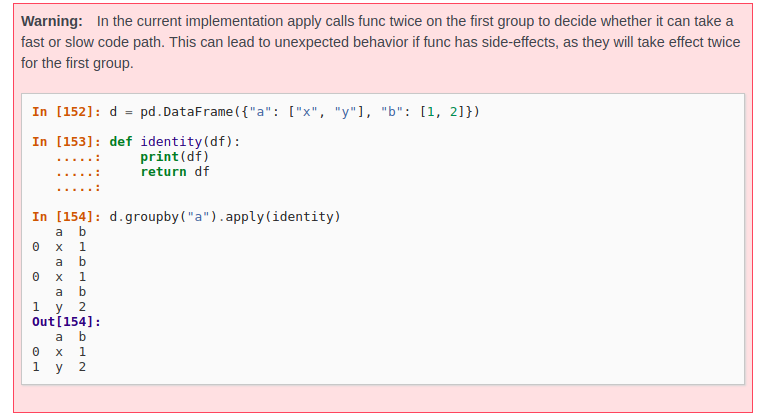

#### Suppressing the group keys

In [91]:
df.groupby('smoker', group_keys=False).apply(top_5)

<class 'pandas.core.frame.DataFrame'> (151, 7)
<class 'pandas.core.frame.DataFrame'> (151, 7)
<class 'pandas.core.frame.DataFrame'> (93, 7)


,total_bill,tip,sex,smoker,day,time,size
212,48.33,9.00,Male,No,Sat,Dinner,4
23,39.42,7.58,Male,No,Sat,Dinner,4
59,48.27,6.73,Male,No,Sat,Dinner,4
141,34.30,6.70,Male,No,Thur,Lunch,6
47,32.40,6.00,Male,No,Sun,Dinner,4
170,50.81,10.00,Male,Yes,Sat,Dinner,3
183,23.17,6.50,Male,Yes,Sun,Dinner,4
214,28.17,6.50,Female,Yes,Sat,Dinner,3
181,23.33,5.65,Male,Yes,Sun,Dinner,2
211,25.89,5.16,Male,Yes,Sat,Dinner,4


In [94]:
df.groupby('smoker').agg({'sex':'count', 'tip':[np.mean,'std']})

sex       tip          
       count      mean       std
smoker                          
No       151  2.991854  1.377190
Yes       93  3.008710  1.401468

### Quantile and bucket analysis

In [95]:
pd.cut(df['tip'], 4).value_counts()

(0.991, 3.25]    163
(3.25, 5.5]       69
(5.5, 7.75]       10
(7.75, 10.0]       2
Name: tip, dtype: int64

In [96]:
pd.qcut(df['tip'], 4).value_counts()

(0.999, 2.0]     78
(3.562, 10.0]    61
(2.9, 3.562]     61
(2.0, 2.9]       44
Name: tip, dtype: int64

In [97]:
pd.qcut([1,2,3,4], 4).value_counts()

(0.999, 1.75]    1
(1.75, 2.5]      1
(2.5, 3.25]      1
(3.25, 4.0]      1
dtype: int64

In [98]:
pd.qcut([1,2,3,4,5], 4).value_counts()

(0.999, 2.0]    2
(2.0, 3.0]      1
(3.0, 4.0]      1
(4.0, 5.0]      1
dtype: int64

In [99]:
pd.qcut([1,2,3,4,5], [0.3,0.5,1]).value_counts()

(2.1990000000000003, 3.0]    1
(3.0, 5.0]                   2
dtype: int64

### Example: Filling missing values with group-specific values

In [100]:
with_holes = df.copy()
with_holes['tip'][::3] = np.nan
with_holes['total_bill'][::4] = np.nan
with_holes.head()

/home/santos/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/santos/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,total_bill,tip,sex,smoker,day,time,size
0,NaN,NaN,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,NaN,Male,No,Sun,Dinner,2
4,NaN,3.61,Female,No,Sun,Dinner,4


In [101]:
with_holes.groupby('smoker').apply(lambda group: group.fillna(group.mean()))

total_bill       tip     sex smoker   day    time  size
smoker                                                             
No     0     18.851304  3.180882  Female     No   Sun  Dinner     2
       1     10.340000  1.660000    Male     No   Sun  Dinner     3
       2     21.010000  3.500000    Male     No   Sun  Dinner     3
       3     23.680000  3.180882    Male     No   Sun  Dinner     2
       4     18.851304  3.610000  Female     No   Sun  Dinner     4
       5     25.290000  4.710000    Male     No   Sun  Dinner     4
       6      8.770000  3.180882    Male     No   Sun  Dinner     2
       7     26.880000  3.120000    Male     No   Sun  Dinner     4
       8     18.851304  1.960000    Male     No   Sun  Dinner     2
       9     14.780000  3.180882    Male     No   Sun  Dinner     2
       10    10.270000  1.710000    Male     No   Sun  Dinner     2
       11    35.260000  5.000000  Female     No   Sun  Dinner     4
       12    18.851304  3.180882    Male     No   Sun  Dinner     2
       13    18.430000  3.000000    Male     No   Sun  Dinner     4
       14    14.830000  3.020000  Female     No   Sun  Dinner     2
       15    21.580000  3.180882    Male     No   Sun  Dinner     2
       16    18.851304  1.670000  Female     No   Sun  Dinner     3
       17    16.290000  3.710000    Male     No   Sun  Dinner     3
       18    16.970000  3.180882  Female     No   Sun  Dinner     3
       19    20.650000  3.350000    Male     No   Sat  Dinner     3
       20    18.851304  4.080000    Male     No   Sat  Dinner     2
       21    20.290000  3.180882  Female     No   Sat  Dinner     2
       22    15.770000  2.230000  Female     No   Sat  Dinner     2
       23    39.420000  7.580000    Male     No   Sat  Dinner     4
       24    18.851304  3.180882    Male     No   Sat  Dinner     2
       25    17.810000  2.340000    Male     No   Sat  Dinner     4
       26    13.370000  2.000000    Male     No   Sat  Dinner     2
       27    12.690000  3.180882    Male     No   Sat  Dinner     2
       28    18.851304  4.300000    Male     No   Sat  Dinner     2
       29    19.650000  3.000000  Female     No   Sat  Dinner     2
...                ...       ...     ...    ...   ...     ...   ...
Yes    203   16.400000  2.500000  Female    Yes  Thur   Lunch     2
       204   20.897794  3.066167    Male    Yes  Thur   Lunch     4
       205   16.470000  3.230000  Female    Yes  Thur   Lunch     3
       206   26.590000  3.410000    Male    Yes   Sat  Dinner     3
       207   38.730000  3.066167    Male    Yes   Sat  Dinner     4
       208   20.897794  2.030000    Male    Yes   Sat  Dinner     2
       209   12.760000  2.230000  Female    Yes   Sat  Dinner     2
       210   30.060000  3.066167    Male    Yes   Sat  Dinner     3
       211   25.890000  5.160000    Male    Yes   Sat  Dinner     4
       213   13.270000  3.066167  Female    Yes   Sat  Dinner     2
       214   28.170000  6.500000  Female    Yes   Sat  Dinner     3
       215   12.900000  1.100000  Female    Yes   Sat  Dinner     2
       216   20.897794  3.066167    Male    Yes   Sat  Dinner     5
       217   11.590000  1.500000    Male    Yes   Sat  Dinner     2
       218    7.740000  1.440000    Male    Yes   Sat  Dinner     2
       219   30.140000  3.066167  Female    Yes   Sat  Dinner     4
       220   20.897794  2.200000    Male    Yes   Fri   Lunch     2
       221   13.420000  3.480000  Female    Yes   Fri   Lunch     2
       222    8.580000  3.066167    Male    Yes   Fri   Lunch     1
       224   20.897794  1.580000    Male    Yes   Fri   Lunch     2
       225   16.270000  3.066167  Female    Yes   Fri   Lunch     2
       226   10.090000  2.000000  Female    Yes   Fri   Lunch     2
       229   22.120000  2.880000  Female    Yes   Sat  Dinner     2
       230   24.010000  2.000000    Male    Yes   Sat  Dinner     4
       231   15.690000  3.066167    Male    Yes   Sat  Dinner     3
       234   15.530000  3.066167    Male    Yes   Sat  Dinner     2


In [102]:
with_holes.loc[with_holes.tip.isna(),:].groupby('smoker')\
.apply(lambda group: group.fillna(group.mean()))

total_bill  tip     sex smoker   day    time  size
smoker                                                        
No     0     17.287568  NaN  Female     No   Sun  Dinner     2
       3     23.680000  NaN    Male     No   Sun  Dinner     2
       6      8.770000  NaN    Male     No   Sun  Dinner     2
       9     14.780000  NaN    Male     No   Sun  Dinner     2
       12    17.287568  NaN    Male     No   Sun  Dinner     2
       15    21.580000  NaN    Male     No   Sun  Dinner     2
       18    16.970000  NaN  Female     No   Sun  Dinner     3
       21    20.290000  NaN  Female     No   Sat  Dinner     2
       24    17.287568  NaN    Male     No   Sat  Dinner     2
       27    12.690000  NaN    Male     No   Sat  Dinner     2
       30     9.550000  NaN    Male     No   Sat  Dinner     2
       33    20.690000  NaN  Female     No   Sat  Dinner     4
       36    17.287568  NaN    Male     No   Sat  Dinner     3
       39    31.270000  NaN    Male     No   Sat  Dinner     3
       42    13.940000  NaN    Male     No   Sun  Dinner     2
       45    18.290000  NaN    Male     No   Sun  Dinner     2
       48    17.287568  NaN    Male     No   Sun  Dinner     3
       51    10.290000  NaN  Female     No   Sun  Dinner     2
       54    25.560000  NaN    Male     No   Sun  Dinner     4
       57    26.410000  NaN  Female     No   Sat  Dinner     2
       66    16.450000  NaN  Female     No   Sat  Dinner     2
       75    10.510000  NaN    Male     No   Sat  Dinner     2
       78    22.760000  NaN    Male     No  Thur   Lunch     2
       81    16.660000  NaN    Male     No  Thur   Lunch     2
       84    17.287568  NaN    Male     No  Thur   Lunch     2
       87    18.280000  NaN    Male     No  Thur   Lunch     2
       99    12.460000  NaN    Male     No   Fri  Dinner     2
       108   17.287568  NaN    Male     No   Sat  Dinner     2
       111    7.250000  NaN  Female     No   Sat  Dinner     1
       114   25.710000  NaN  Female     No   Sun  Dinner     3
...                ...  ...     ...    ...   ...     ...   ...
Yes    72    20.640417  NaN  Female    Yes   Sat  Dinner     2
       90    28.970000  NaN    Male    Yes   Fri  Dinner     2
       93    16.320000  NaN  Female    Yes   Fri  Dinner     2
       96    20.640417  NaN    Male    Yes   Fri  Dinner     2
       102   44.300000  NaN  Female    Yes   Sat  Dinner     3
       105   15.360000  NaN    Male    Yes   Sat  Dinner     2
       138   16.000000  NaN    Male    Yes  Thur   Lunch     2
       168   20.640417  NaN  Female    Yes   Sat  Dinner     2
       171   15.810000  NaN    Male    Yes   Sat  Dinner     2
       174   16.820000  NaN    Male    Yes   Sun  Dinner     2
       177   14.480000  NaN    Male    Yes   Sun  Dinner     2
       180   20.640417  NaN    Male    Yes   Sun  Dinner     4
       183   23.170000  NaN    Male    Yes   Sun  Dinner     4
       186   20.900000  NaN  Female    Yes   Sun  Dinner     3
       189   23.100000  NaN    Male    Yes   Sun  Dinner     3
       192   20.640417  NaN    Male    Yes  Thur   Lunch     2
       198   13.000000  NaN  Female    Yes  Thur   Lunch     2
       201   12.740000  NaN  Female    Yes  Thur   Lunch     2
       204   20.640417  NaN    Male    Yes  Thur   Lunch     4
       207   38.730000  NaN    Male    Yes   Sat  Dinner     4
       210   30.060000  NaN    Male    Yes   Sat  Dinner     3
       213   13.270000  NaN  Female    Yes   Sat  Dinner     2
       216   20.640417  NaN    Male    Yes   Sat  Dinner     5
       219   30.140000  NaN  Female    Yes   Sat  Dinner     4
       222    8.580000  NaN    Male    Yes   Fri   Lunch     1
       225   16.270000  NaN  Female    Yes   Fri   Lunch     2
       231   15.690000  NaN    Male    Yes   Sat  Dinner     3
       234   15.530000  NaN    Male    Yes   Sat  Dinner     2
       237   32.830000  NaN    Male    Yes   Sat  Dinner     2
       240   20.640417  NaN  Female    Yes   Sat  Dinner     2

[82 rows x 7 columns]

In [103]:
df_new = with_holes.groupby('smoker')\
.apply(lambda group: group.fillna(group.mean()))

df_new.index = range(df_new.shape[0])

In [104]:
df_new.head()

,total_bill,tip,sex,smoker,day,time,size
0,18.851304,3.180882,Female,No,Sun,Dinner,2
1,10.340000,1.660000,Male,No,Sun,Dinner,3
2,21.010000,3.500000,Male,No,Sun,Dinner,3
3,23.680000,3.180882,Male,No,Sun,Dinner,2
4,18.851304,3.610000,Female,No,Sun,Dinner,4


In [105]:
df_new.loc[with_holes.tip.isna(),:].head()

,total_bill,tip,sex,smoker,day,time,size
0,18.851304,3.180882,Female,No,Sun,Dinner,2
3,23.680000,3.180882,Male,No,Sun,Dinner,2
6,8.770000,3.180882,Male,No,Sun,Dinner,2
9,14.780000,3.180882,Male,No,Sun,Dinner,2
12,18.851304,3.180882,Male,No,Sun,Dinner,2


In [106]:
df_new.loc[with_holes.tip.isna(),:].tail()

,total_bill,tip,sex,smoker,day,time,size
231,13.420000,3.480000,Female,Yes,Fri,Lunch,2
234,16.270000,3.066167,Female,Yes,Fri,Lunch,2
237,24.010000,2.000000,Male,Yes,Sat,Dinner,4
240,20.897794,1.000000,Male,Yes,Sat,Dinner,2
243,22.670000,2.000000,Male,Yes,Sat,Dinner,2


## Pivot tables and Cross-tabulation

In [107]:
df.pivot_table(index='day', columns='time', aggfunc='count') 

sex         size       smoker          tip       total_bill      
time Dinner Lunch Dinner Lunch Dinner Lunch Dinner Lunch     Dinner Lunch
day                                                                      
Fri    12.0   7.0   12.0   7.0   12.0   7.0   12.0   7.0       12.0   7.0
Sat    87.0   NaN   87.0   NaN   87.0   NaN   87.0   NaN       87.0   NaN
Sun    76.0   NaN   76.0   NaN   76.0   NaN   76.0   NaN       76.0   NaN
Thur    1.0  61.0    1.0  61.0    1.0  61.0    1.0  61.0        1.0  61.0

In [108]:
df.pivot_table(index = 'sex', columns='smoker', values=['total_bill', 'tip'])

tip           total_bill           
smoker        No       Yes         No        Yes
sex                                             
Female  2.773519  2.931515  18.105185  17.977879
Male    3.113402  3.051167  19.791237  22.284500

In [109]:
df.pivot_table(index = 'sex', columns='smoker', values='tip', aggfunc='mean')

smoker,No,Yes
sex,,
Female,2.773519,2.931515
Male,3.113402,3.051167
